<a href="https://colab.research.google.com/github/sangjin94/itwill-python/blob/main/ml12_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # plot(), scatter(), show(), imshow(), ...
from matplotlib import image     # imread(), imsave()

from sklearn import datasets
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# Python에서 이미지 다루기

In [4]:
# scikit-learn의 데이터셋에서 제공하는 샘플 이미지를 로드
china = datasets.load_sample_image('china.jpg')

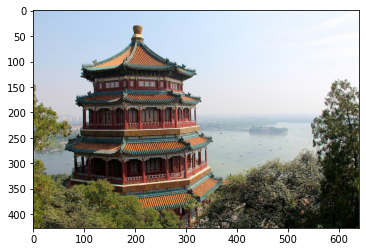

In [5]:
# matplotlib.pyplot.imshow(array): 2d 또는3d 배열을 argument로 전달받음.
plt.imshow(china)  # 이미지가 저장된 배열을 화면에 출력
# plt.axis('off')  # 좌표축 제거
plt.show()

In [6]:
type(china)  # ndarray(배열)

numpy.ndarray

In [7]:
china.shape  
#> (height, width, color_rgb) shape의 3d array - color image
#> 각 픽셀의 값은 0 ~ 255 scale이거나 또는 0.0 ~ 1.0 scale.

(427, 640, 3)

In [8]:
china[:, :, 0]

array([[174, 174, 174, ..., 250, 250, 250],
       [172, 173, 173, ..., 251, 251, 251],
       [174, 174, 174, ..., 252, 252, 252],
       ...,
       [ 88, 147, 122, ...,  39,   8,   6],
       [122, 129, 118, ...,   9,   9,  16],
       [116, 104, 108, ...,  43,  13,  15]], dtype=uint8)

In [9]:
np.min(china[:, :, 0])

0

In [10]:
np.max(china[:, :, 0])

255

In [11]:
# 0 ~ 255 scale의 값을 0.0 ~ 1.0 scale의 값으로 변환
china_scaled = china / 255
china_scaled[:, :, 0]

array([[0.68235294, 0.68235294, 0.68235294, ..., 0.98039216, 0.98039216,
        0.98039216],
       [0.6745098 , 0.67843137, 0.67843137, ..., 0.98431373, 0.98431373,
        0.98431373],
       [0.68235294, 0.68235294, 0.68235294, ..., 0.98823529, 0.98823529,
        0.98823529],
       ...,
       [0.34509804, 0.57647059, 0.47843137, ..., 0.15294118, 0.03137255,
        0.02352941],
       [0.47843137, 0.50588235, 0.4627451 , ..., 0.03529412, 0.03529412,
        0.0627451 ],
       [0.45490196, 0.40784314, 0.42352941, ..., 0.16862745, 0.05098039,
        0.05882353]])

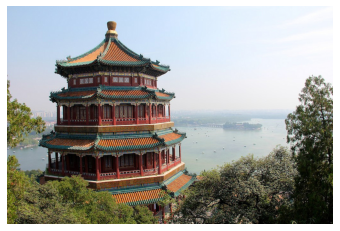

In [12]:
plt.imshow(china_scaled)
plt.axis('off')
plt.show()

In [13]:
# matplotlib.image.imsave(fname, arr): 파일 fname에 이미지 배열 arr을 이미지 형식(jpg, png, ...)으로 저장
image.imsave('china.jpg', china_scaled)  # Google Colab 세션에 저장.

In [14]:
# matplotlib.image.imread(fname): 이미지 파일 fname을 읽어서 배열을 리턴
img = image.imread('china.jpg')
type(img)

numpy.ndarray

이미지 정보를 저장하고 있는 배열의 shape

* (height, width): height x width 크기의 흑백 이미지
* (height, width, 3): height x width x 3(RGB) 크기의 컬러 이미지
* (height, width, 4): height x width x 4(RGBA) 크기의 컬러 이미지
    * R(Red), G(Green), B(Blue), A(Alpha: 투명도)


## 이미지 자르기

In [15]:
china.shape

(427, 640, 3)

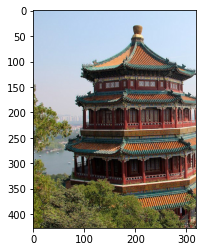

In [16]:
cropped = china[:, :320, :]  # 이미지 자르기 - numpy ndarray slicing
plt.imshow(cropped)
plt.show()

## numpy ndarray 저장/로드

* `numpy.save(file_name, array)`: 배열 array를 파일 file_name에 numpy 객체 타입으로 저장.
* `numpy.load(file_name)`: 파일 file_name에 저장된 numpy 객체를 읽고 ndarray를 리턴.


In [17]:
np.save('china_crop.npy', cropped)  # ndarray를 파일에 저장.

In [18]:
crop_read = np.load('china_crop.npy')  # 파일에 저장된 ndarray을 읽고 반환.
crop_read.shape

(427, 320, 3)

# MNIST datasets

70,000개의 숫자 손글씨 흑백 이미지(28x28)가 numpy 배열 형태로 저장된 데이터 셋.

In [19]:
mnist = datasets.fetch_openml('mnist_784')

In [20]:
mnist.keys()  # dict와 비슷한 타입

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [21]:
# feature matrix, target vector
X, y = mnist['data'], mnist['target']

In [22]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X.shape  #> (70,000, 784): (이미지 샘플 개수, 이미지 샘플 1개의 픽셀 개수)
# scikit-learn의 ML 모델들을 훈련/예측할 때는 (n_samples, n_features) 모양의 2차원 배열을 사용하기 때문에.
# 이미지 하나는 28x28 크기인데, 1차원 배열로 펼쳐져 있는 모습.

(70000, 784)

In [24]:
y  #> 손글씨가 어떤 문자인지 타겟 문자열을 저장하고 있는 배열.

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [25]:
# 타겟 벡터 y의 데이터 타입을 문자열(object)에서 정수(np.int)로 변환
y = y.astype(np.int8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

## MNIST 데이터 시각화

In [26]:
image_0 = X[0].reshape((28, 28))  # 데이터에서 인덱스 0번 아이템 선택(1d array), 28x28 모양의 2d array로 변환
image_0.shape

(28, 28)

In [27]:
image_0

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

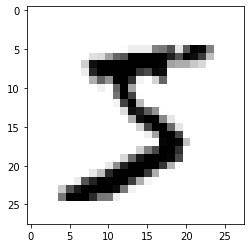

In [28]:
plt.imshow(image_0, cmap=plt.cm.binary)  # cmap 파라미터: color map
# cmap='binary': white(0) ~ black(255 또는 1.0)
# cmap='gray': black(0) ~ white(255 또는 1.0)
plt.show()

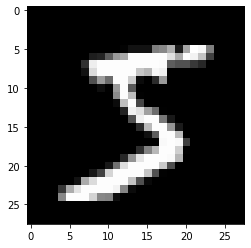

In [29]:
plt.imshow(image_0, cmap=plt.cm.gray)
plt.show()

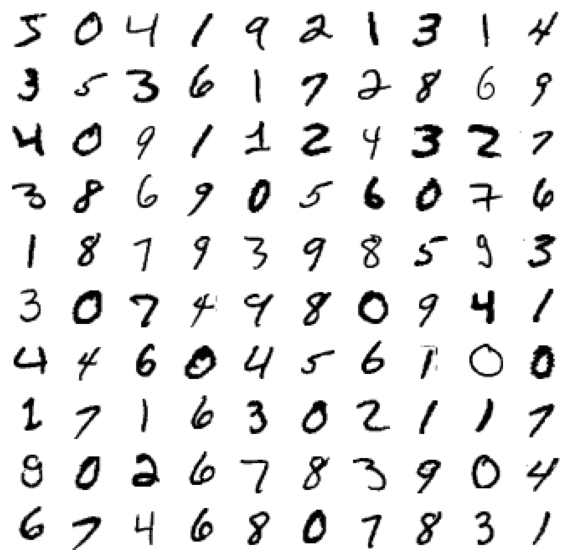

In [30]:
# 이미지 100개를 10x10 모양의 subplot에 시각화
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))  # subplot 100개 생성

for i in range(10):  # subplot의 row 인덱스 0 ~ 9 반복
    for j in range(10):  # subplot의 column 인덱스 0 ~ 9 반복
        # MNIST 데이터 셋에서 1차원 배열을 가지고 와서 (28, 28) 모양의 2차원 배열로 변환
        img = X[i * 10 + j].reshape((28, 28))
        # 2d array를 [i, j] 인덱스의 subplot에 출력
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        # subplot의 좌표축을 제거
        ax[i, j].axis('off')

plt.show()

# Train/test 분리

* `train_test_split()` 함수 이용
* MNIST 데이터 셋은 60,000개의 훈련 셋과 10,000개의 테스트 셋으로 이루어져 있음. (랜덤하게 섞여 있음.)


In [31]:
train_size = 60_000
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [32]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [33]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [34]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

# LogisticRegression

In [35]:
# 모델 생성 
log_clf=LogisticRegression(n_jobs=-1,random_state=42)

In [37]:
# 모델 훈련
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [39]:
# 훈련 셋 평가(훈련 셋 예측값 계산, 실젯값 비교, 정확도 계산)
log_clf.score(X_train,y_train)

0.9339166666666666

In [40]:
# 교차 검증(Cross Validation) 수행
cv_score = cross_val_score(estimator=log_clf,X=X_train,y=y_train)

In [41]:
cv_score

array([0.91858333, 0.91566667, 0.91933333, 0.91183333, 0.92475   ])

In [43]:
np.mean(cv_score) # Test set에서의 평가 점수(정확도)를 예측.

0.9180333333333334

## 틀린 예측 분석

In [44]:
# 훈련 셋 예측값 
train_pred=log_clf.predict(X_train)
train_pred[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [46]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [47]:
X_wrong= X_train[y_train != train_pred] # 훈련 셋에서 실젯값과 예측값이 다른 샘플들


In [49]:
X_wrong.shape

(3965, 784)

In [50]:
y_wrong=y_train[y_train != train_pred] # 훈련 타겟에서 실젯값과 예측값이 다른 타겟들 

In [51]:
y_wrong.shape

(3965,)

In [52]:
# 예측이 틀린 첫번째 샘플 시각화

In [57]:
wrong_pred=train_pred[y_train!=train_pred]

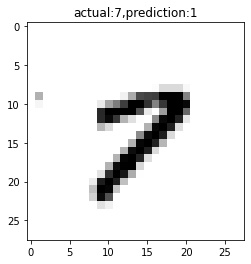

In [58]:
plt.imshow(X_wrong[0].reshape((28,28)),cmap=plt.cm.binary)
plt.title(f'actual:{y_wrong[0]},prediction:{wrong_pred[0]}')
plt.show()

In [59]:
# 예측이 틀린 첫 100개 샘플들을 시각화

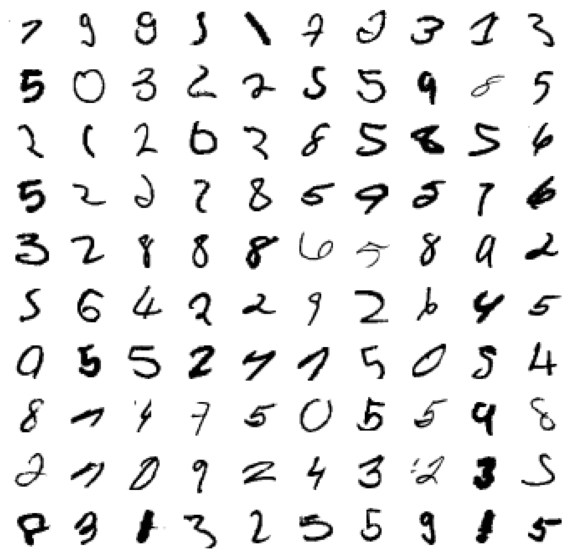

In [63]:
# 이미지 100개를 10x10 모양의 subplot에 시각화
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))  # subplot 100개 생성

for i in range(10):  # subplot의 row 인덱스 0 ~ 9 반복
    for j in range(10):  # subplot의 column 인덱스 0 ~ 9 반복
        # MNIST 데이터 셋에서 1차원 배열을 가지고 와서 (28, 28) 모양의 2차원 배열로 변환
        img = X_wrong[i * 10 + j].reshape((28, 28))
        # 2d array를 [i, j] 인덱스의 subplot에 출력
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        # subplot의 좌표축을 제거
        ax[i, j].axis('off')

plt.show()

## Confusion Matrix

In [64]:
conf_mat=confusion_matrix(y_train,train_pred)

In [65]:
conf_mat

array([[5764,    0,   15,    9,   14,   36,   33,   10,   38,    4],
       [   1, 6584,   32,   19,    6,   20,    3,   10,   55,   12],
       [  28,   47, 5445,   89,   61,   20,   56,   51,  140,   21],
       [  17,   23,  118, 5582,    6,  162,   14,   50,  119,   40],
       [  13,   22,   23,    9, 5491,    8,   48,   15,   42,  171],
       [  57,   18,   40,  161,   48, 4793,   82,   15,  160,   47],
       [  34,    9,   40,    0,   35,   58, 5713,    4,   21,    4],
       [  11,   20,   58,   28,   42,    8,    4, 5896,   20,  178],
       [  27,   93,   55,  122,   19,  136,   36,   18, 5293,   52],
       [  21,   22,   14,   70,  129,   33,    3,  138,   45, 5474]])

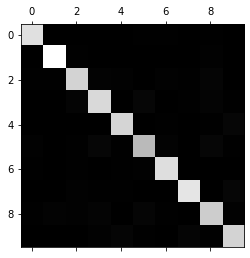

In [66]:
# matplotlib.pyplot.matshow(arr): 2d 배열을 시각화
plt.matshow(conf_mat,cmap=plt.cm.gray) # cmap='gray': black(0)~white(1.0)
plt.show()

confusion matrix를 시각화 할 때 문제점:

* 목적: 틀린 개수가 많은 부분을 밝게, 틀린 개수가 적은 부분을 어둡게 시각화
* 정답률(93.3%)이 높기 때문에, 대각선 이외의 셀들은 상대적으로 숫자가 너무 작고, 따라서 거의 검은색으로 보임.
* 샘플들이 클래스마다 고르게 분포하지 않음.(1이 다른 숫자들에 비해 더 많음.)
  * 각 클래스에서 틀린 비율로 시각

In [75]:
np.sum(conf_mat,axis=1,keepdims=True) #> axis=1 방향으로 각열의 합을 계산

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [70]:
# confusion matrix의 숫자들을 비율로 표현
conf_mat_normed=conf_mat/np.sum(conf_mat,axis=1,keepdims=True)

In [72]:
# 대각선에 있는 숫자들을 모두 0으로 변경 
np.fill_diagonal(conf_mat_normed,0)

In [73]:
conf_mat_normed

array([[0.        , 0.        , 0.0025325 , 0.0015195 , 0.00236367,
        0.006078  , 0.0055715 , 0.00168833, 0.00641567, 0.00067533],
       [0.00014832, 0.        , 0.00474637, 0.00281815, 0.00088994,
        0.00296648, 0.00044497, 0.00148324, 0.00815782, 0.00177989],
       [0.00469956, 0.00788855, 0.        , 0.0149379 , 0.01023834,
        0.00335683, 0.00939913, 0.00855992, 0.02349782, 0.00352467],
       [0.00277279, 0.00375143, 0.01924645, 0.        , 0.00097863,
        0.0264231 , 0.00228348, 0.00815528, 0.01940956, 0.00652422],
       [0.00222527, 0.00376583, 0.00393701, 0.00154057, 0.        ,
        0.00136939, 0.00821636, 0.00256761, 0.00718932, 0.0292708 ],
       [0.01051467, 0.00332042, 0.00737871, 0.02969932, 0.00885445,
        0.        , 0.01512636, 0.00276702, 0.02951485, 0.00866999],
       [0.00574518, 0.00152078, 0.00675904, 0.        , 0.00591416,
        0.00980061, 0.        , 0.0006759 , 0.0035485 , 0.0006759 ],
       [0.00175579, 0.00319234, 0.0092577

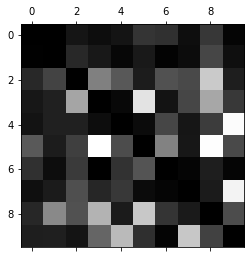

In [74]:
plt.matshow(conf_mat_normed,cmap=plt.cm.gray)
plt.show()
#> 상대적으로 틀린 비율이 높은 샘플: 
#> 5(실제) -> 3(예측), 5- > 8 ,  4 -> 9 , ...

## LogisticRegression 하이퍼파라미터 튜닝

In [77]:
# Grid Search Cross Validation에서 사용할 파라미터들의 조합
params={'solver':['saga'],
        'penalty':['l1','l2'],
        'C':[0.001,0.01,0.1,1.0,10,100]}

In [79]:
# Grid Search 교차 검증 객체 생성
grid_search_cv=GridSearchCV(estimator=log_clf,
                            param_grid=params,
                            n_jobs=-1,
                            return_train_score=True)

In [ ]:
# 모델 훈련
grid_search_cv.fit(X_train,y_train)

# SGDClassifier

In [ ]:
# SGDClassifier 생성

In [ ]:
# SGDClassifier 훈련

In [ ]:
# 훈련 셋 예측,정확도 계산

In [ ]:
# CV 점수로 테스트 셋의 정확도를 추측.


In [ ]:
# GridSearchCV을 통해서 hyperparameter 튜닝